# Machine Learning
<hr/>

Submitted by <br>
Name: **Janvi Agrawal** <br> 
<hr/>

# SECTION 1

# Overview

## Objectives
Make and fine-tune a model, which is ready for deployment.<br>

• Find out a Dataset, and compare at least two different algorithms and choose the best one<br>
• Use suitable Data Preprocessing and Feature Selection/Engineering Methods<br>
• Fine tune the model and hyper parameters and Finalise the Model<br>
• Make the model deployment-ready by giving User-Input provision<br>

For instance, if the problem is defined as "Predicting Player Performance Category based on current form, age and number of fans", the final output should be:<br>
Enter your current form (1 - Excellent, 2 - Good, 3 - Bad): 2<br>
Enter your age: 28<br>
Enter the fanbase: 200000<br>


Output:<br>
You will be rated 3 Stars in the Player Performance Category

## Problem Definition
For above mentioned objectives, detailed analysis are being performed in this lab. And the purpose of the lab is to make and fine tune a model which is ready for deployment. 



## Approach
Jupyter Notebook is used for the succesful execution of this ML CAC-3!

Approach which I followed is as follows:

1. Identified various requirements of the lab as per sections.
2. Went through sections of this Lab to understand its purpose and detailed idea of executing models to satisfy the needs of the questions:
    
    -->1. The <b>first section</b> consists of Lab-Overview part with objectives and problem definition, followed by approach and other sections of the lab.
    
    -->2. The <b>second section</b> consists of the EDA, visualization, model building with and without hyperparameter tuning.
    
    -->3. The <b>Third section</b> consists of user input module.
    
    -->4. The <b>Fourth section</b> consists of conlcusion.
    
    -->5. The <b>Fifth section</b> states reference links used throughout the lab. 

# SECTION 2

# Question:
### Identify and visualize which factors contribute to vehicle data:

### Build a prediction model that will perform the following:

### 1. Predict the selling price of a car
### 2. Preferably and based on model performance, choose a model that will give you the best prediction.

### Importing necessary liabraries

In [1]:
import sys
if sys.version_info[0] == 3:
    import tkinter as tk
    from tkinter import filedialog as fd
    from tkinter import ttk
    from tkinter.messagebox import showinfo
else:
    import Tkinter as tk
    from Tkinter import filedialog as fd
    from Tkinter import ttk
    from Tkinter.messagebox import showinfo

In [2]:
import numpy as np 
from math import sqrt
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
root = tk.Tk()
root.withdraw()

file_path = fd.askopenfilename()

In [4]:
data=pd.read_excel(file_path)

In [5]:
data.head(7)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,130000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0,440000
6,Maruti Wagon R LXI DUO BSIII,2007,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0,96000


In [6]:
data=data.drop("name",axis=1)

In [7]:
data.shape

(8128, 11)

In [8]:
data.dtypes

year               int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
selling_price      int64
dtype: object

## EDA and Visualization

In [9]:
l1=["mileage","engine","max_power"]

for i in l1:
    data[i]=data[i].str.replace("[a-zA-Z, ,/]",'')

Removing units from mileage, engine and max_power

In [10]:
for i in l1:
    data[i]=pd.to_numeric(data[i])

Converting the above transformed data into numeric data type.

In [11]:
data.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


In [12]:
data.isnull().sum()

year               0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        222
seats            221
selling_price      0
dtype: int64

We can see that, there are null values in dataset.

In [13]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        data[i].fillna(data[i].mean(),inplace=True)

Removing null values

In [14]:
data.describe()

,year,km_driven,mileage,engine,max_power,seats,selling_price
count,8128.000000,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8.128000e+03
mean,2013.804011,6.981951e+04,19.418783,1458.625016,91.587374,5.416719,6.382718e+05
std,4.044249,5.655055e+04,3.981875,497.017504,35.255594,0.946450,8.062534e+05
min,1983.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.999900e+04
25%,2011.000000,3.500000e+04,16.800000,1197.000000,69.000000,5.000000,2.549990e+05
50%,2015.000000,6.000000e+04,19.418783,1248.000000,83.100000,5.000000,4.500000e+05
75%,2017.000000,9.800000e+04,22.277500,1582.000000,101.250000,5.000000,6.750000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000e+07


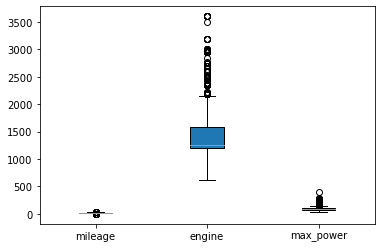

In [15]:
plt.boxplot(data[l1], notch=None, vert=None, patch_artist=True, widths=None,labels=l1);

From the above plot, we can identify that there are outliers in data.

In [16]:
l1=["mileage","engine","max_power","km_driven","seats","selling_price"]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [17]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

engine           1183
fuel                0
km_driven         170
max_power         611
mileage            24
owner               0
seats            1874
seller_type         0
selling_price     600
transmission        0
year               81
dtype: int64

The above code shows the total count of outliers in data.

In [18]:
data1 = data[~((data[l1] < (Q1 - 1.5 * IQR)) |(data[l1] > (Q3 + 1.5 * IQR))).any(axis=1)]

Removing outliers using InterQuartileRange

In [19]:
data1.shape,data.shape

((5659, 11), (8128, 11))

Comparing the size of original data(before removing outliers) and the transformed data(after removing outliers)

In [20]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).sum()

engine           620
fuel               0
km_driven         41
max_power        285
mileage            7
owner              0
seats              0
seller_type        0
selling_price     49
transmission       0
year              83
dtype: int64

We can see that, there is decrease in the count of outliers.

### BAR CHART

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64


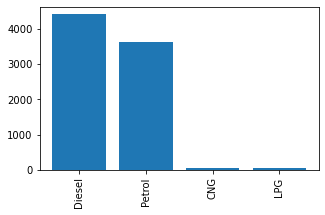

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64


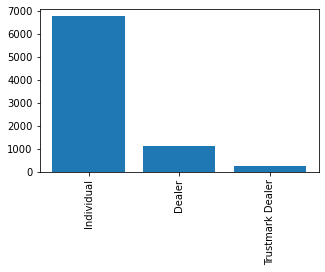

transmission
Manual       7078
Automatic    1050
Name: transmission, dtype: int64


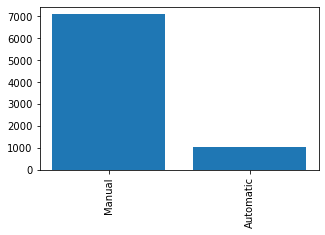

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


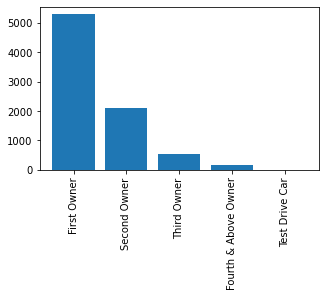

In [21]:
categories = ["fuel","seller_type","transmission","owner"]

for i, c in enumerate(categories):
    v = data[c].unique()
    
    g = data.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.xticks(rotation=90)
    plt.show()

1. From Figure 1: we can say that, maximum car is having diesel as a fuel, followed by petrol, CNG and LPG.
2. From Figure 2: we can say that, the maximum seller type is Individual followed by Dealer and TrustMark Dealer.
3. From Figure 3: we can say that, Manual cars are having maximum number of count.
4. From Figure 4: the count of First owner is maximum and the least is Test Drive Car with count of 5.

### Scatter Plot

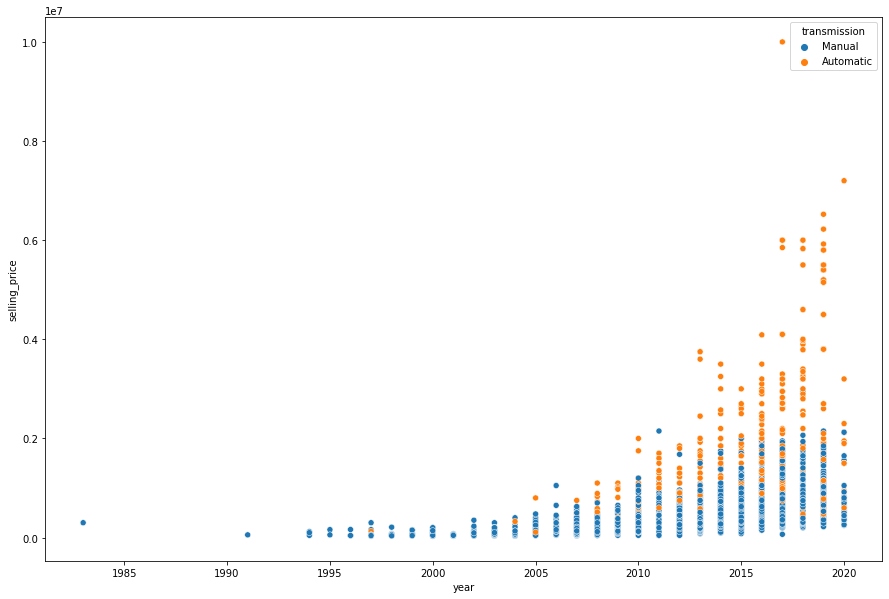

In [22]:
#year and transmission feature

fig, scatter = plt.subplots(figsize = (15,10))
scatter = sns.scatterplot(data=data, x="year", y="selling_price", hue="transmission")

In general, the mean and deviation of car prices increase with each year, and cars with automatic transmission tend to be more expensive.

### Scatter Plot

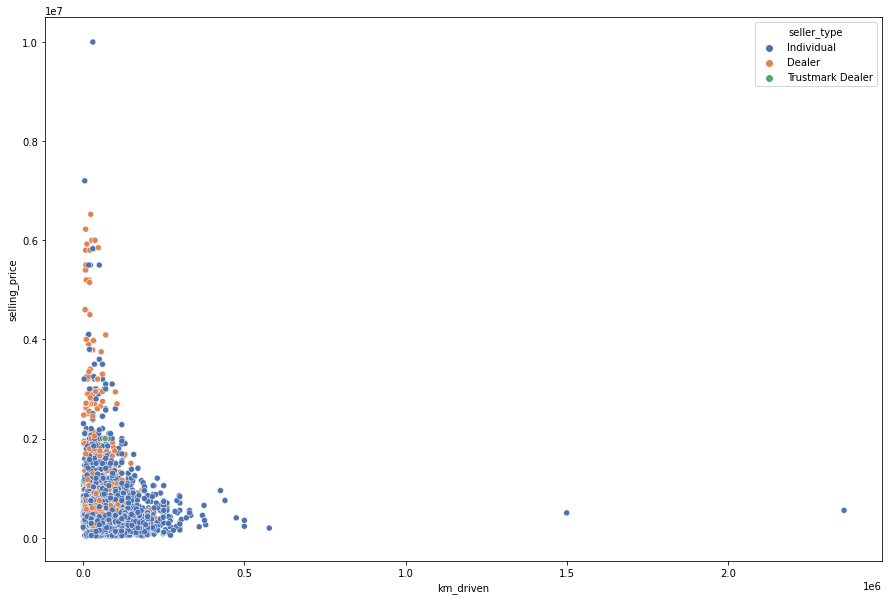

In [23]:
#km_driven and seller_type features

fig, scatter = plt.subplots(figsize = (15,10))
scatter = sns.scatterplot(data=data, x="km_driven", y="selling_price",hue="seller_type", palette="deep")


As can be seen, selling prices tend to go down with the rise of km_driven. Also, cars with 200000-400000 km driven are usually sold by individuals.

### Sub Scatter Plots

In [24]:
#engine and max_power features

def plot_col_signif(data, feat_cols, targ_col, n_rows=1, n_cols=1):
    fig, axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(6*n_cols,4*n_rows), squeeze=False, constrained_layout = True)

    for i in range(n_rows):
        for j in range(n_cols):
            try:
                feat_col = feat_cols[i*n_cols+j]
            except:
                plt.show()
                return
            
            pears_corr = data.corr()[feat_col][targ_col]
            spear_corr = data.corr(method='spearman')[feat_col][targ_col]
            
            axes[i,j].scatter(data[feat_col], data[targ_col])
            axes[i,j].set_xlabel('feature')
            axes[i,j].set_ylabel('target')
            axes[i,j].set_title(f'Feature: {feat_col}\nPearson\'s r = {pears_corr:.2f}\n Spearman\'s ρ = {spear_corr:.2f}')
            
plt.show()

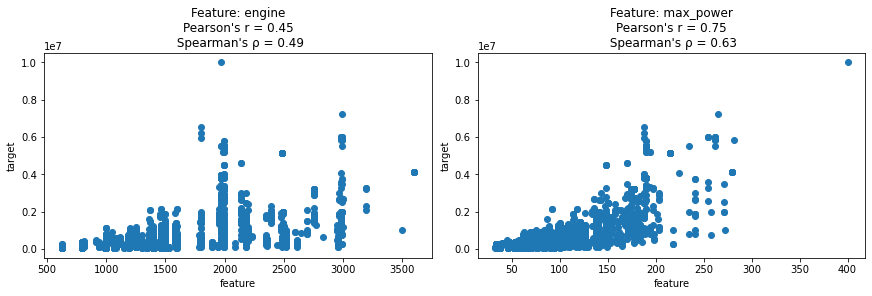

In [25]:
plot_col_signif(data, ['engine', 'max_power'], 'selling_price', 1, 2)

The scatter plots above represent dependency between engine, max_power and selling_price.
<br>
As it is observed, both features have a moderate-high correlation with the selling price.

### HeatMap

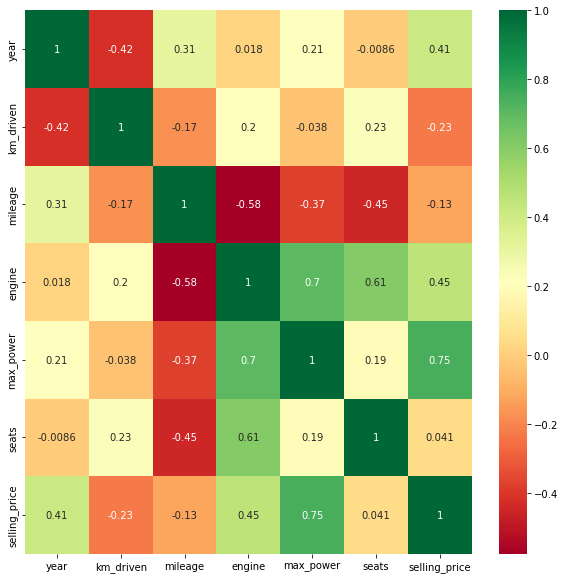

In [26]:
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(data[top_corr_feature].corr(),annot = True, cmap = 'RdYlGn')

The above heatmap shows that, the value closer to 1 i.e: shaded with green color is having positive relationship.
The values nearer to -0.4 i.e: shaded with red is having negative relationship.

### Correlation

In [27]:
data.corr()

,year,km_driven,mileage,engine,max_power,seats,selling_price
year,1.000000,-0.418006,0.310383,0.017773,0.213504,-0.008623,0.414092
km_driven,-0.418006,1.000000,-0.171426,0.203954,-0.037795,0.225172,-0.225534
mileage,0.310383,-0.171426,1.000000,-0.575831,-0.374515,-0.452085,-0.125454
engine,0.017773,0.203954,-0.575831,1.000000,0.703898,0.610309,0.453567
max_power,0.213504,-0.037795,-0.374515,0.703898,1.000000,0.191911,0.746085
seats,-0.008623,0.225172,-0.452085,0.610309,0.191911,1.000000,0.041161
selling_price,0.414092,-0.225534,-0.125454,0.453567,0.746085,0.041161,1.000000


The above correlation matrix shows the relationship between each and every variables.
The value closer to one, have positive correlation and the values closer to -1 have nagative correlation. The values nearer to zero have no correlation.

#### Label Encoding

In [28]:
features = data.drop("selling_price", axis=1)

In [29]:
le=[]
for i in data.columns:
    if data.dtypes[i]==object:
        data[i] = LabelEncoder().fit_transform(data[i])

#### Spliting data into X and y for train test split

In [30]:
X = data.drop("selling_price", axis=1)
y = data["selling_price"]

#### Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s = scaler.fit(X)
X_scaled=s.transform(X)

#### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=42)

## Modeling

In [33]:
rmse=[]
model_n=[]
r2_s=[]

random = RandomForestRegressor()
dt=DecisionTreeRegressor()
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
models = [random,dt,lr,lasso,ridge]
    
for model in models:
    model=model.fit(X_train, y_train)
    
    # Predict the Test set results
    y_pred = model.predict(X_test)
    rmse_val=sqrt(mean_squared_error(y_test, y_pred)) 
    r2=r2_score(y_test,y_pred)
    rmse.append(rmse_val)
    model_n.append(str(model))
    r2_s.append(r2)

### HyperParameter Tunning

In [34]:
param_decision={"splitter":["best","random"],
                "max_depth" : [1,3,9,11],
                "min_samples_leaf":[1,5,10],
                "min_weight_fraction_leaf":[0.1,0.4,0,0.8],
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,70,100] }

param_lasso = {'alpha':[0.02,  0.025]}

param_ridge = {'alpha':[200,265, 290,500]}

params=[param_decision,param_lasso,param_ridge]

dt = DecisionTreeRegressor(random_state=0)
lasso=Lasso(random_state=0)
ridge=Ridge(random_state=0)

Models=[dt,lasso,ridge]

for i, j in zip(params,Models):
    print(j)
    grid_search = GridSearchCV(estimator=j, param_grid=i, scoring = "r2")
    grid_search.fit(X_train, y_train)
    grid_search.best_estimator_
    model=grid_search.best_estimator_
    print(i,j)
    
    y_pred = model.predict(X_test)
    rmse_val=sqrt(mean_squared_error(y_test, y_pred)) 
    r2=r2_score(y_test,y_pred)
    rmse.append(rmse_val)
    model_n.append("Hyperparameter "+str(j))
    r2_s.append(r2)

DecisionTreeRegressor(random_state=0)
{'splitter': ['best', 'random'], 'max_depth': [1, 3, 9, 11], 'min_samples_leaf': [1, 5, 10], 'min_weight_fraction_leaf': [0.1, 0.4, 0, 0.8], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [None, 10, 70, 100]} DecisionTreeRegressor(random_state=0)
Lasso(random_state=0)
{'alpha': [0.02, 0.025]} Lasso(random_state=0)
Ridge(random_state=0)
{'alpha': [200, 265, 290, 500]} Ridge(random_state=0)


In [35]:
d1 = list(zip(model_n, rmse,r2_s))
 
df = pd.DataFrame(d1,
                  columns=['Model', 'RMSE','R Score'])
df=df.sort_values("R Score",ascending=False)


In [36]:
df

,Model,RMSE,R Score
0,RandomForestRegressor(),130658.130869,0.976388
5,Hyperparameter DecisionTreeRegressor(random_st...,138009.662195,0.973656
1,DecisionTreeRegressor(),147738.898827,0.969811
2,LinearRegression(),474054.418707,0.689172
6,Hyperparameter Lasso(random_state=0),474054.419048,0.689172
3,Lasso(),474054.438318,0.689172
4,Ridge(),474062.234902,0.689162
7,Hyperparameter Ridge(random_state=0),475714.593530,0.686991


From the above dataframe we can see that RandomForestRegressor is having the highest R Score i;e: 97.52

## Model Deployment

In [37]:
numeric_features=[i for i in features.columns if features.dtypes[i]!=object]
categorical_features=[i for i in features.columns if features.dtypes[i]==object]

dictionary={}
for i in categorical_features:
    dictionary[str(i)]={}
    dictionary[str(i)][str(features[i].unique())]=str(X[i].unique())

In [38]:
userinput={}
for i in numeric_features:
    userentry=float(input("Enter "+ i +" : "))
    userinput[str(i)]=userentry
    
for i,j in zip(categorical_features, range(0,5)):
    key, val = list(dictionary.items())[j]
    userentry=input("Enter from the given options for "+str(i)+ str(val)+" : ")
    userinput[str(i)]=userentry

Enter year : 2021
Enter km_driven : 45200
Enter mileage : 45
Enter engine : 12
Enter max_power : 20
Enter seats : 5
Enter from the given options for fuel{"['Diesel' 'Petrol' 'LPG' 'CNG']": '[1 3 2 0]'} : 1
Enter from the given options for seller_type{"['Individual' 'Dealer' 'Trustmark Dealer']": '[1 0 2]'} : 1
Enter from the given options for transmission{"['Manual' 'Automatic']": '[1 0]'} : 0
Enter from the given options for owner{"['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'\n 'Test Drive Car']": '[0 2 4 1 3]'} : 0


In [39]:
user_data = pd.DataFrame.from_dict(userinput, orient ='index').T
user_data

,year,km_driven,mileage,engine,max_power,seats,fuel,seller_type,transmission,owner
0,2021.0,45200.0,45.0,12.0,20.0,5.0,1,1,0,0


In [40]:
X_newscaled=s.transform(user_data)

In [41]:
model=RandomForestRegressor()

fitted_model=model.fit(X_train, y_train)

prediction = fitted_model.predict(X_newscaled)

print("The predicted selling price for your car is: ",prediction)

The predicted selling price for your car is:  [212456.64]


In [42]:
print(fitted_model.feature_importances_)

[0.20377369 0.02113695 0.00312284 0.0056895  0.0023804  0.00190828
 0.01907292 0.02011948 0.7190056  0.00379033]


In [43]:
feat_importances = pd.Series(fitted_model.feature_importances_, index = X.columns)
feat_importances

year            0.203774
km_driven       0.021137
fuel            0.003123
seller_type     0.005690
transmission    0.002380
owner           0.001908
mileage         0.019073
engine          0.020119
max_power       0.719006
seats           0.003790
dtype: float64

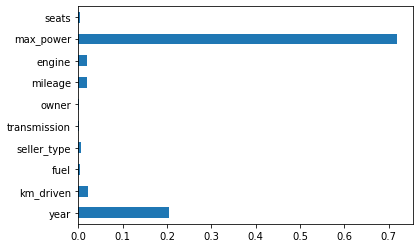

In [44]:
feat_importances.plot(kind = 'barh')
plt.show()

## Conclusion: 
Concluding the lab: For this lab we had to go with model building using various machine learning techniques starting from data preprocessing, feature engineering, tuning the model, finalising the model based on the highest accuracy.

Overall, a good practice to learn all the techniques and logics and algorithms behind ML models.

# SECTION 5

## Reference Links:
1. https://www.geeksforgeeks.org/introduction-to-pysimplegui/
2. https://github.com/PySimpleGUI/PySimpleGUI/issues/2247
3. https://easygui.readthedocs.io/en/latest/api.html